# Модуль 2.
## Лекція 07. Приклад 2. Класифікація хвороби

Based on:
1.   [Breast Cancer Classification. Part1](https://medium.com/@hazallgultekin/part1-breast-cancer-classification-ffa904b76afe)
2.   [Breast Cancer Classification. Part2](https://medium.com/@hazallgultekin/part2-breast-cancer-classification-e397d399e180)




###### Завантаження бібліотек роботи з даними та візуалізації

In [1]:
import pandas as pd #for analyze
import numpy  as np #for vector
import seaborn as sns #for visualization
import matplotlib.pyplot as plt #for visualization
from matplotlib.colors import ListedColormap

###### Завантаження бібліотек sklearn

In [2]:
# ML library
from sklearn.preprocessing import StandardScaler #for standartization
from sklearn.model_selection import train_test_split, GridSearchCV #verisetini train ve test olarak ayırır, KNN ile ilgili best parametreleri seçerken kullanırız
from sklearn.metrics import accuracy_score, confusion_matrix #%30 başarılı gibi, score sonucunda nerede hata var nerede yok bunu tespit eder
from sklearn.neighbors import KNeighborsClassifier, NeighborhoodComponentsAnalysis, LocalOutlierFactor
from sklearn.decomposition import PCA

###### Підключення до гугл драйву

In [3]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


#### DATASET ОПИС [Exploratory Data Analysis Of Breast Cancer Dataset](https://medium.com/@tutorialcreation81/exploratory-data-analysis-of-breast-cancer-dataset-8c4cd7712f6f)

Завантажити з [Breast Cancer Wisconsin (Diagnostic)](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data)


###### Path to dataset

In [21]:
datasetpath = '/content/gdrive/MyDrive/Colab_Notebooks/DATA_SETS/data.csv'

Завантаження



In [22]:
# close warning library
import warnings
warnings.filterwarnings("ignore")
# зчитування датасету
data = pd.read_csv(datasetpath)

In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
print(data.head())

##### Якщо є невизначені поля, відкидаємо

In [24]:
# Return new object with labels in requested axis removed.
data.drop(['Unnamed: 32', 'id'], inplace = True, axis = 1)

##### Зміна імя поля 'diagnosis' на 'target'

In [25]:
data = data.rename(columns = {'diagnosis':'target'})

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 31 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   target                   569 non-null    object 
 1   radius_mean              569 non-null    float64
 2   texture_mean             569 non-null    float64
 3   perimeter_mean           569 non-null    float64
 4   area_mean                569 non-null    float64
 5   smoothness_mean          569 non-null    float64
 6   compactness_mean         569 non-null    float64
 7   concavity_mean           569 non-null    float64
 8   concave points_mean      569 non-null    float64
 9   symmetry_mean            569 non-null    float64
 10  fractal_dimension_mean   569 non-null    float64
 11  radius_se                569 non-null    float64
 12  texture_se               569 non-null    float64
 13  perimeter_se             569 non-null    float64
 14  area_se                  5

In [15]:
print(data.head())

        State  Total.Rate  Total.Number  Total.Population  Rates.Age.< 18  \
0     Alabama       214.2       71529.0        33387205.0             2.0   
1      Alaska       128.1        6361.0         4966180.0             1.7   
2     Arizona       165.6       74286.0        44845598.0             2.5   
3    Arkansas       223.9       45627.0        20382448.0             2.3   
4  California       150.9      393980.0       261135696.0             2.6   

   Rates.Age.18-45  Rates.Age.45-64  Rates.Age.> 64  \
0             18.5            244.7          1017.8   
1             11.8            170.9           965.2   
2             13.6            173.6           840.2   
3             17.6            250.1          1048.3   
4             13.7            163.7           902.4   

   Rates.Age and Sex.Female.< 18  Rates.Age and Sex.Male.< 18  ...  \
0                            2.0                          2.1  ...   
1                            0.0                          0.0  ...

##### В полі **target** змінюємо M на 1, інакше на 0.

In [27]:
data["target"] = [1 if i.strip() == 'M' else 0 for i in data.target]

#####  Опис завантажених даних

In [28]:
# Tells how many rows and columns there are
print("Формат датасету", data.shape)

# Tells the data length.
print('Кількість прикладів', len(data))

# Fetch the first 5 rows.
print('Перші 5 векторів ознак')
print(data.head())

# Prints information about the DataFrame. It includes the number of columns,
# column labels, column data types, memory usage, range index, and number of cells in each column (non-empty values).
# data.info()

Формат датасету (569, 31)
Кількість прикладів 569
Перші 5 векторів ознак
   target  radius_mean  texture_mean  perimeter_mean  area_mean  \
0       1        17.99         10.38          122.80     1001.0   
1       1        20.57         17.77          132.90     1326.0   
2       1        19.69         21.25          130.00     1203.0   
3       1        11.42         20.38           77.58      386.1   
4       1        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   symmetry_mean  ...  radius_worst  texture_worst  perimeter

##### Кореляція

 — статистичний показник, який вимірює зв’язок між двома змінними, і його значення можуть коливатися від -1 до 1. Позитивне значення вказує на позитивний зв’язок, а від’ємне — на негативний.
Візуалізація кореляцій між стовпцями у кадрі даних і групування цих кореляцій на карті кластеризації.
Такий тип візуалізації корисний для кращого розуміння зв’язків і групувань між змінними в наборі даних.

In [29]:
# Calculates a summary of statistics for DataFrame columns. This function returns mean, std and IQR values.
describe  = data.describe()
corr_matrix = data.corr()
corr_matrix

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
target,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


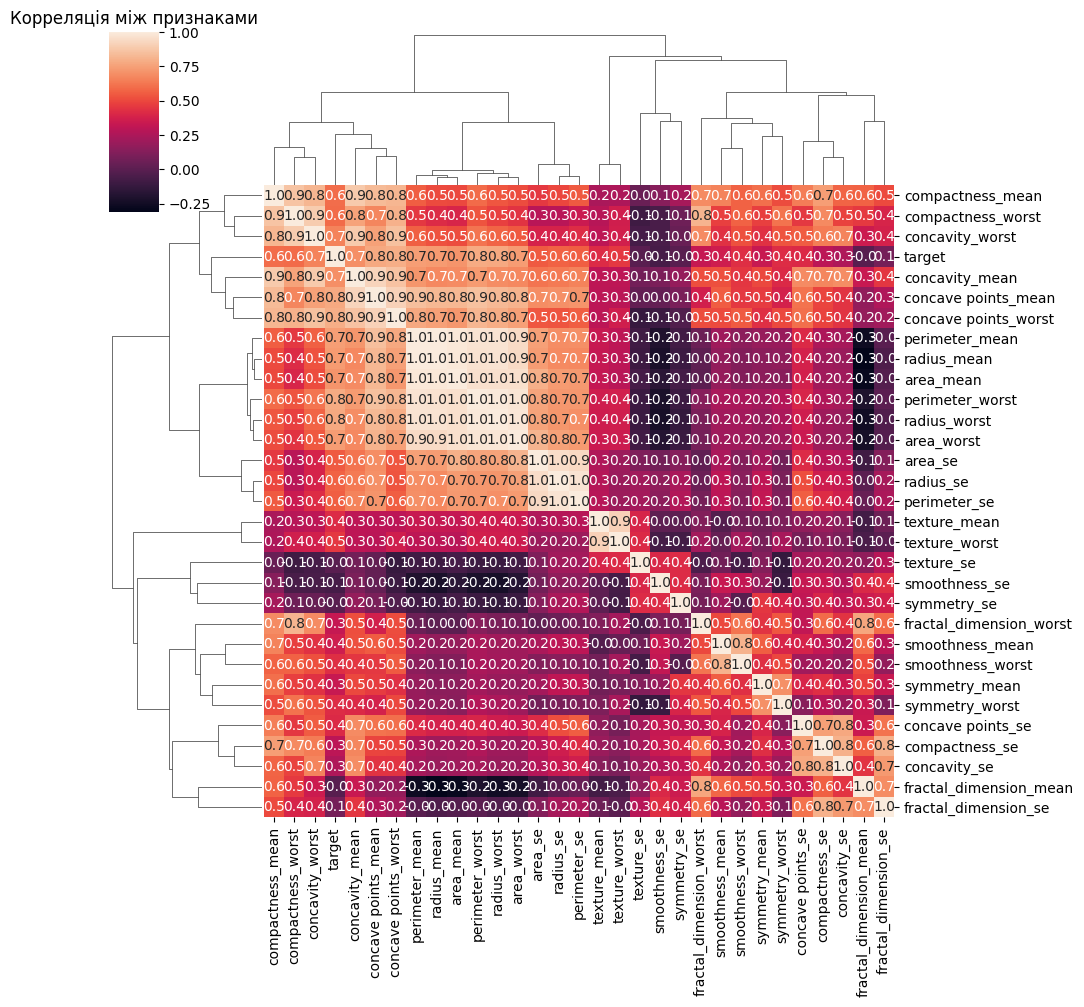

In [30]:
sns.clustermap(corr_matrix, annot = True, fmt = ".1f")
plt.title("Корреляція між признаками")
plt.show()

##### Відбір значущих признаків, кореляція більш 0.75

Text(0.5, 1.0, 'Correlation Between Features w Corr Threshold 0.75')

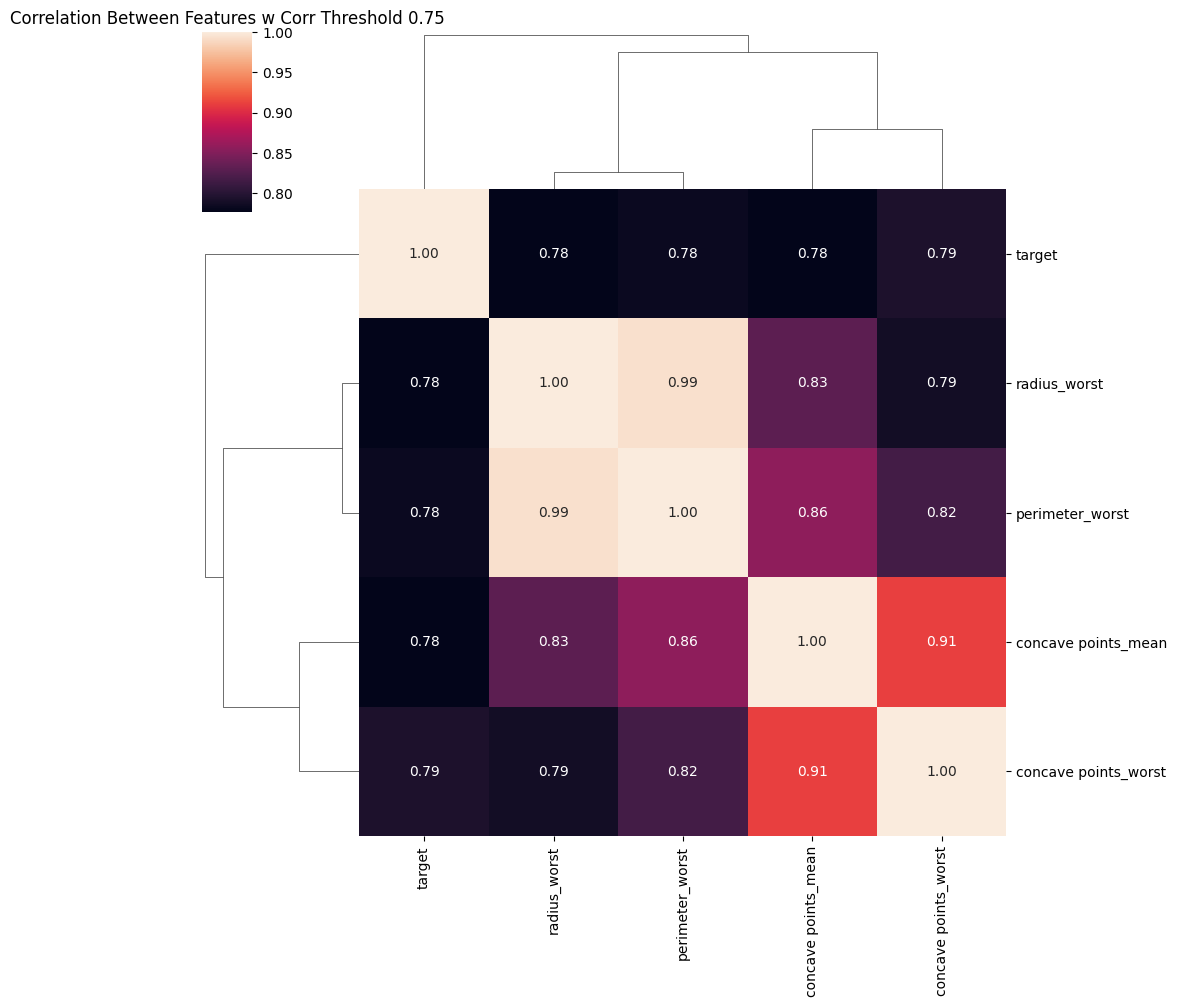

In [31]:
threshold = 0.75
filtre = np.abs(corr_matrix["target"]) > threshold
corr_features = corr_matrix.columns[filtre].tolist()
sns.clustermap(data[corr_features].corr(), annot = True, fmt = ".2f")
plt.title("Correlation Between Features w Corr Threshold 0.75")

#####  Візуальне порівняння розподілу «цільового» класу для кожної ознаки

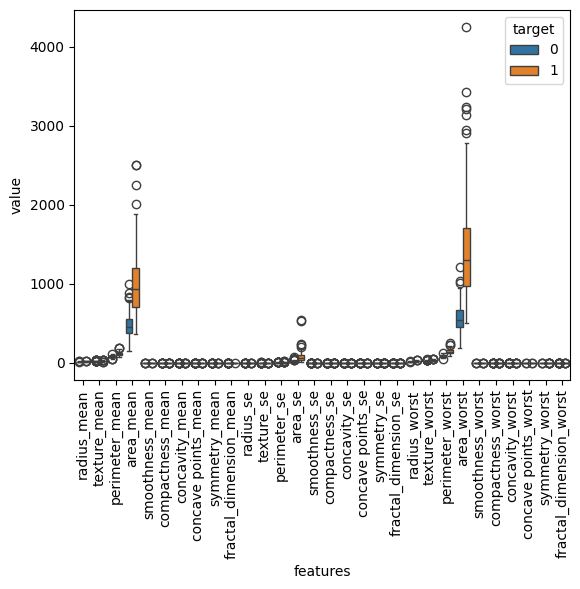

In [32]:
data_melted = pd.melt(data, id_vars = "target",
                      var_name = "features",
                      value_name = "value")
plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()

##### Перехресна (парна) діаграма, що показує зв’язки між певними змінними певного кадру даних.

Для кращего зрозуміння зв’язку між змінними та виділення різних груп чи категорій.

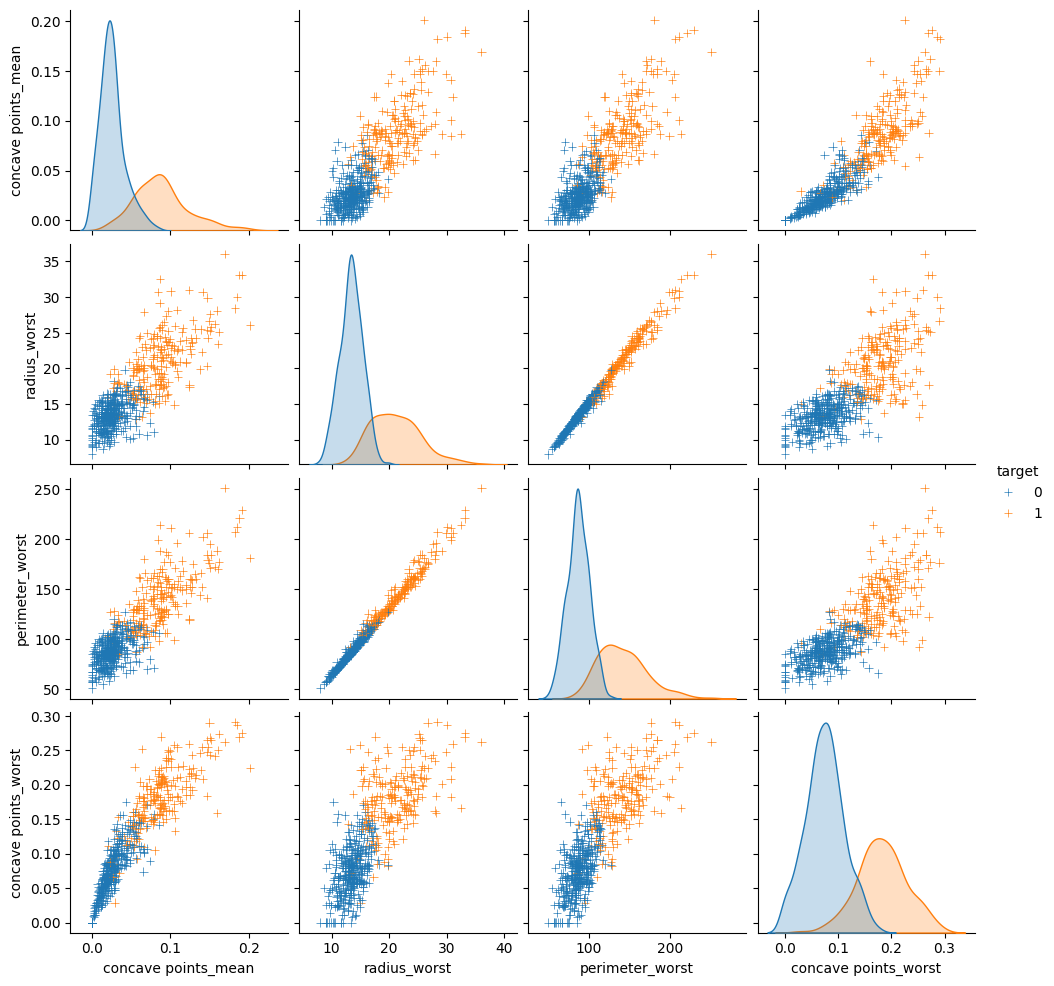

In [33]:
sns.pairplot(data[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

##### Локальний фактор викиду (выброс, LOF - Local Outlier Factoro) — алгоритм для виявлення викидів.
Алгоритм обчислює локальне відхилення щільності заданої точки даних стосовно її сусідів. Він вважає викидами зразки, які мають значно меншу щільність, ніж їхні сусіди.

Алгоритм LOF позначає точки даних як **нормальні** або **викидні** за допомогою даних x і зберігає ці мітки в масиві під назвою y_pred.

Алгоритм LOF виявляє викиди, а потім очищаємо набір даних, видаляючи ці викиди з набору даних. Це корисно для отримання більш точних результатів для аналізу даних і моделювання.

In [34]:
y = data.target
x = data.drop(["target"],axis = 1)
columns = x.columns.tolist()

clf = LocalOutlierFactor()
y_pred = clf.fit_predict(x)
X_score = clf.negative_outlier_factor_

outlier_score = pd.DataFrame()
outlier_score["score"] = X_score

# threshold
threshold = -2.5
filtre = outlier_score["score"] < threshold
outlier_index = outlier_score[filtre].index.tolist()


##### Створюється діаграма розсіювання. На графіку викиди відображаються синім знаком +, тоді як інші точки даних представлені чорним кольором і крапками меншого розміру.

Додаються великі точки перетину, що представляють оцінки викидів, а розміри точок перетину змінюються залежно від оцінки викидів кожної точки даних.

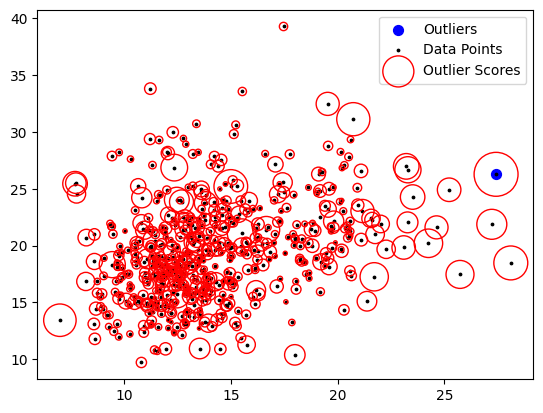

In [35]:
plt.figure()
plt.scatter(x.iloc[outlier_index,0], x.iloc[outlier_index,1],color = "blue", s = 50, label = "Outliers")
plt.scatter(x.iloc[:,0], x.iloc[:,1], color = "k", s = 3, label = "Data Points")

radius = (X_score.max() - X_score)/(X_score.max() - X_score.min())
outlier_score["radius"] = radius
plt.scatter(x.iloc[:,0], x.iloc[:,1], s = 1000*radius, edgecolors = "r",facecolors = "none", label = "Outlier Scores")
plt.legend()
plt.show()

# drop outliers
x = x.drop(outlier_index)
y = y.drop(outlier_index).values

#### ТРЕНУВАННЯ та оцінка ЯКОСТІ

##### Розподіл  даних

In [36]:
# Train, test, split
test_size = 0.3
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size = test_size, random_state = 42)

##### Масштабування даних
Середнє значення 0, дисперсія 1

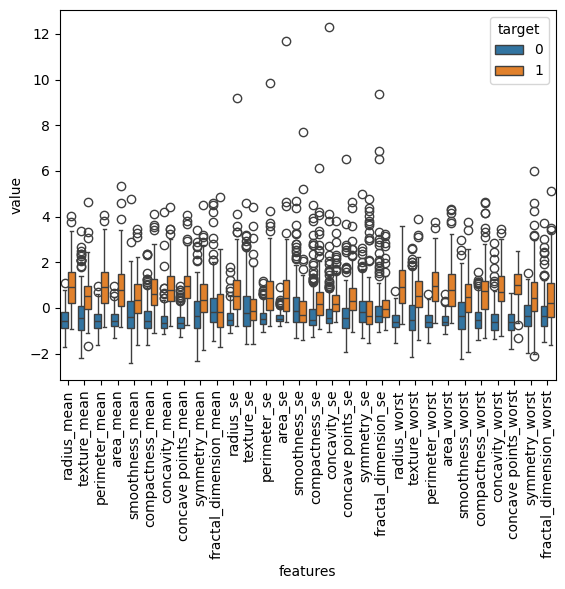

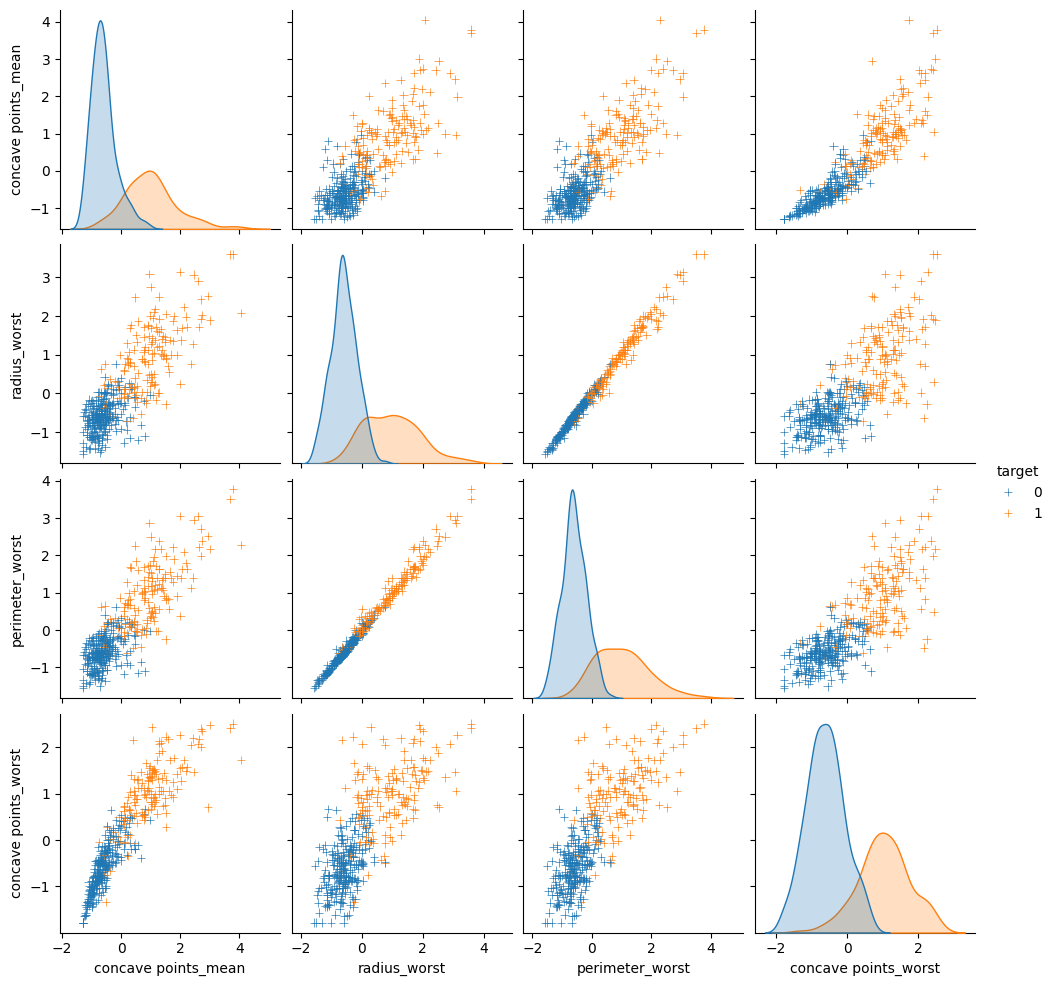

In [37]:
# This code first standardizes the data, then boxplots and dual plots.
# It helps to visually examine the distribution and relationships of data.

# Box plot is used to see the distribution and outliers of the data, while
# Pair plot is used to understand the relationships between variables.
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

X_train_df = pd.DataFrame(X_train, columns = columns)
X_train_df_describe = X_train_df.describe()
X_train_df["target"] = Y_train
# box plot
data_melted = pd.melt(X_train_df, id_vars = "target",
                      var_name = "features",
                      value_name = "value")

plt.figure()
sns.boxplot(x = "features", y = "value", hue = "target", data = data_melted)
plt.xticks(rotation = 90)
plt.show()


# pair plot
sns.pairplot(X_train_df[corr_features], diag_kind = "kde", markers = "+",hue = "target")
plt.show()

##### Тренування та тестування моделі класифікації KNN.

Оцінка продуктивність моделі за допомогою оцінки точності та матриці. Ці оцінки допомагають зрозуміти, наскільки успішною є модель і як відбувається процес класифікації.

In [38]:
# %% Basic KNN Method
# This code creates a model using the KNN classification algorithm, trains
# this model, and evaluates its performance on test data. The results obtained demonstrate the classification ability and accuracy of the model.
knn = KNeighborsClassifier(n_neighbors = 2)
knn.fit(X_train, Y_train)
y_pred = knn.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
acc = accuracy_score(Y_test, y_pred)
score = knn.score(X_test, Y_test)
print("Score: ",score)
print("CM: ",cm)
print("Basic KNN Acc: ",acc)

Score:  0.9532163742690059
CM:  [[108   1]
 [  7  55]]
Basic KNN Acc:  0.9532163742690059


##### Визначення найкращіх параметрів моделі KNN та оцінка продуктивність моделі, навченої цими параметрами.
!!! Найкращі гіперпараметри

In [39]:
def KNN_Best_Params(x_train, x_test, y_train, y_test):

    k_range = list(range(1,31))
    weight_options = ["uniform","distance"]
    print()
    param_grid = dict(n_neighbors = k_range, weights = weight_options)

    knn = KNeighborsClassifier()
    grid = GridSearchCV(knn, param_grid, cv = 10, scoring = "accuracy")
    grid.fit(x_train, y_train)

    print("Best training score: {} with parameters: {}".format(grid.best_score_, grid.best_params_))
    print()

    # Нова модель з найліпшими парметрами
    knn = KNeighborsClassifier(**grid.best_params_)
    knn.fit(x_train, y_train)

    y_pred_test = knn.predict(x_test)
    y_pred_train = knn.predict(x_train)

    cm_test = confusion_matrix(y_test, y_pred_test)
    cm_train = confusion_matrix(y_train, y_pred_train)

    acc_test = accuracy_score(y_test, y_pred_test)
    acc_train = accuracy_score(y_train, y_pred_train)
    print("Test Score: {}, Train Score: {}".format(acc_test, acc_train))
    print()
    print("CM Test: ",cm_test)
    print("CM Train: ",cm_train)

    return grid

In [40]:
grid = KNN_Best_Params(X_train, X_test, Y_train, Y_test)


Best training score: 0.9670512820512821 with parameters: {'n_neighbors': 4, 'weights': 'uniform'}

Test Score: 0.9590643274853801, Train Score: 0.9773299748110831

CM Test:  [[107   2]
 [  5  57]]
CM Train:  [[248   0]
 [  9 140]]


##### Метод головних компонент (PCA – principal component analysis)

Для відображення виконується зменшення розмірності до 2 за допомогою PCA, класифікації за допомогою моделі KNN та візуалізації результатів класифікації. PCA допомогає зробити більш зрозумілу візуалізацію та покращити продуктивність моделі за рахунок зменшення розміру даних.


Best training score: 0.9419230769230769 with parameters: {'n_neighbors': 9, 'weights': 'uniform'}

Test Score: 0.9239766081871345, Train Score: 0.947103274559194

CM Test:  [[103   6]
 [  7  55]]
CM Train:  [[241   7]
 [ 14 135]]


Text(0.5, 1.0, "2-Class classification (k = 9, weights = 'uniform')")

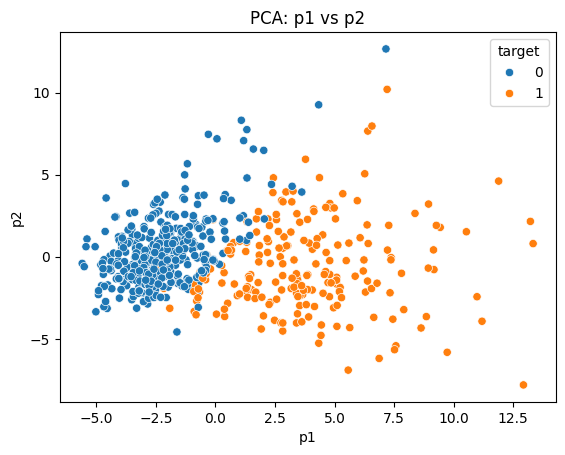

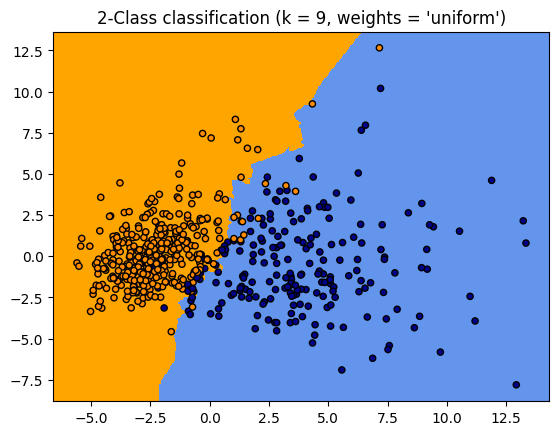

In [41]:
# %% PCA

scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)

pca = PCA(n_components = 2)
pca.fit(x_scaled)
X_reduced_pca = pca.transform(x_scaled)
pca_data = pd.DataFrame(X_reduced_pca, columns = ["p1","p2"])
pca_data["target"] = y
sns.scatterplot(x = "p1", y = "p2", hue = "target", data = pca_data)
plt.title("PCA: p1 vs p2")


X_train_pca, X_test_pca, Y_train_pca, Y_test_pca = train_test_split(X_reduced_pca, y, test_size = test_size, random_state = 42)

grid_pca = KNN_Best_Params(X_train_pca, X_test_pca, Y_train_pca, Y_test_pca)

# visualize
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .05 # step size in the mesh
X = X_reduced_pca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_pca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_pca.best_estimator_.n_neighbors, grid_pca.best_estimator_.weights))

##### Neighbourhood components analysis NCA

Аналіз компонентів сусідства – метод навчання для класифікації багатовимірних даних у окремі класи відповідно до заданої метрики відстані над даними. Функціонально аналог алгоритму K-найближчих сусідів. Використовує пов’язану концепцію, яка називається стохастичними найближчими сусідами.


Best training score: 0.9873076923076922 with parameters: {'n_neighbors': 1, 'weights': 'uniform'}

Test Score: 0.9941520467836257, Train Score: 1.0

CM Test:  [[108   1]
 [  0  62]]
CM Train:  [[248   0]
 [  0 149]]


Text(0.5, 1.0, "2-Class classification (k = 1, weights = 'uniform')")

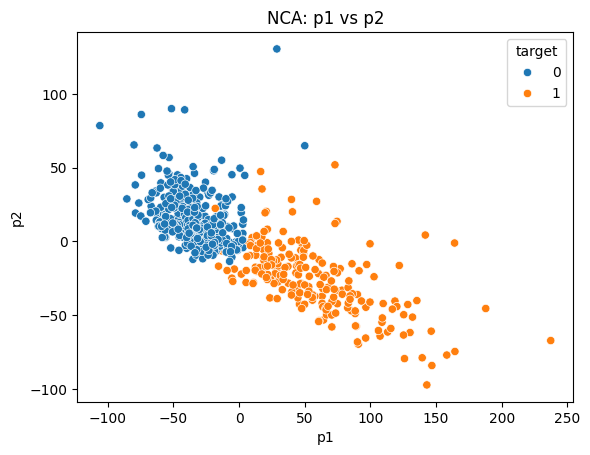

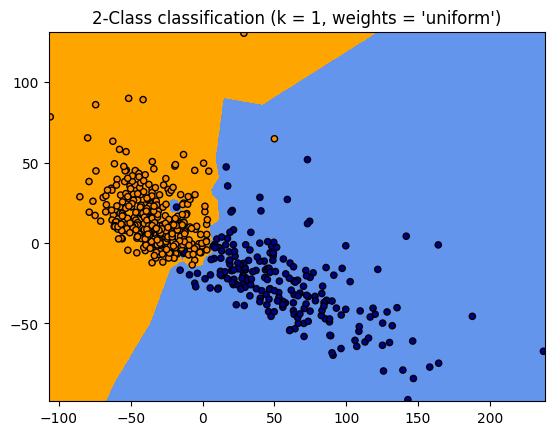

In [42]:
#%% NCA

nca = NeighborhoodComponentsAnalysis(n_components = 2, random_state = 42)
nca.fit(x_scaled, y)
X_reduced_nca = nca.transform(x_scaled)
nca_data = pd.DataFrame(X_reduced_nca, columns = ["p1","p2"])
nca_data["target"] = y
sns.scatterplot(x = "p1",  y = "p2", hue = "target", data = nca_data)
plt.title("NCA: p1 vs p2")

X_train_nca, X_test_nca, Y_train_nca, Y_test_nca = train_test_split(X_reduced_nca, y, test_size = test_size, random_state = 42)

grid_nca = KNN_Best_Params(X_train_nca, X_test_nca, Y_train_nca, Y_test_nca)

# visualize
cmap_light = ListedColormap(['orange',  'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'darkblue'])

h = .2 # step size in the mesh
X = X_reduced_nca
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

Z = grid_nca.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
            edgecolor='k', s=20)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title("%i-Class classification (k = %i, weights = '%s')"
          % (len(np.unique(y)),grid_nca.best_estimator_.n_neighbors, grid_nca.best_estimator_.weights))

##### ТОЧНІСТЬ моделі

Обчислюється показник точності моделі KNN на основі тестових даних і візуально видображаються неправильно класифіковані точки даних.
Це допомагає зрозуміти, які точки даних модель неправильно класифікує, і допомагає оцінити продуктивність моделі.

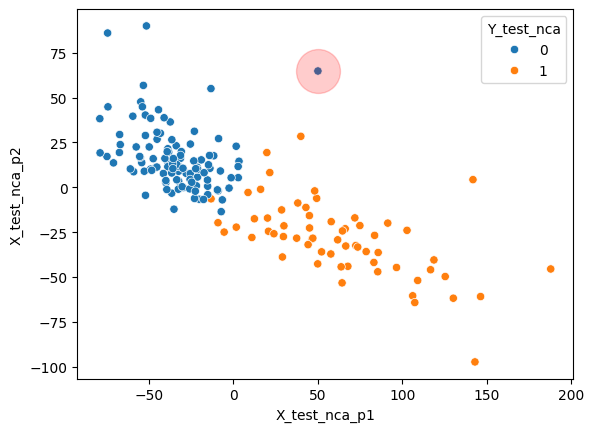

In [ ]:
# %% find wrong decision
knn = KNeighborsClassifier(**grid_nca.best_params_)
knn.fit(X_train_nca,Y_train_nca)
y_pred_nca = knn.predict(X_test_nca)
acc_test_nca = accuracy_score(y_pred_nca,Y_test_nca)
knn.score(X_test_nca,Y_test_nca)

test_data = pd.DataFrame()
test_data["X_test_nca_p1"] = X_test_nca[:,0]
test_data["X_test_nca_p2"] = X_test_nca[:,1]
test_data["y_pred_nca"] = y_pred_nca
test_data["Y_test_nca"] = Y_test_nca

plt.figure()
sns.scatterplot(x="X_test_nca_p1", y="X_test_nca_p2", hue="Y_test_nca",data=test_data)

diff = np.where(y_pred_nca!=Y_test_nca)[0]
plt.scatter(test_data.iloc[diff,0],test_data.iloc[diff,1],label = "Wrong Classified",alpha = 0.2,color = "red",s = 1000)